In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ds=pd.read_csv('googleplaystore.csv')

In [3]:
ds.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
def stats(data):
    print(data.info())
    print('\n')
    print('Shape of dataframe :{}'.format(data.shape))
    print('\n')
    print('Missing values are: {}'.format(data.isnull().sum()))
    print('\n')
    print('Data types of feature are {}'.format(data.dtypes))

In [11]:
stats(ds)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Shape of dataframe :(10841, 13)


Missing values are: App                  0
Category             0
Rating            1474
Reviews              0
Size      

In [21]:
#doubt
ds[ds['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [25]:
ds.iloc[10472,1:]=ds.iloc[10472,1:].shift(1)

In [27]:
ds[ds['Rating']>5]

TypeError: '>' not supported between instances of 'str' and 'int'

In [29]:
ds['Rating'].dtype

dtype('O')

In [30]:
ds['Last Updated']=pd.to_datetime(ds['Last Updated'])

In [31]:
ds['Last Updated'].dtype

dtype('<M8[ns]')

In [32]:
ds['year']=ds['Last Updated'].dt.year
ds['month']=ds['Last Updated'].dt.month

In [33]:
ds.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [34]:
ds['Type'].isna().sum()

1

In [36]:
ds.dropna(subset=['Type'],inplace=True)

In [37]:
ds['Type'].isna().sum()

0

In [38]:
ds['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [42]:
labels=ds['Type'].value_counts().index

In [49]:
values=ds['Type'].value_counts().values

In [50]:
!pip install plotly

In [51]:
import plotly.express as px

In [52]:
px.pie(names=labels,values=values)

In [53]:
ds1=ds[ds['Type']=='Free']
ds2=ds[ds['Type']=='Paid']

In [56]:
free=ds1['year'].value_counts().reset_index()
free

,index,year
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [57]:
free.columns=['year','count']

In [58]:
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [60]:
paid=ds2['year'].value_counts().reset_index()
paid

,index,year
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [62]:
paid.columns=['year','count']
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [64]:
row={'year':2010,'count':0}

In [67]:
paid=paid.append(row,ignore_index=True)

In [68]:
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


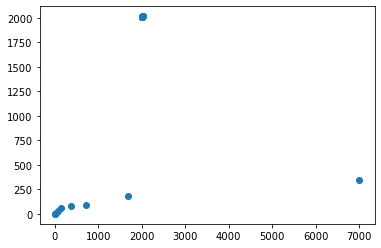

In [69]:
plt.scatter(free,paid)

In [71]:
!pip install chart_studio

In [72]:
import chart_studio.plotly as py
import plotly.graph_objs as go


In [75]:
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot

In [76]:
init_notebook_mode(connected=True)

In [80]:
trace1=go.Scatter(x=free['year'],y=free['count'])
trace2=go.Scatter(x=paid['year'],y=paid['count'])

In [81]:
y=[trace1,trace2]

In [83]:
fig=go.Figure(data=y)
iplot(fig)